# LINEAR REGRESSION ON CAR PRICE PREDICTION DATASET

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
folder_name = r"C:/Sumay"
name = "CarPrice_Assignment.csv"
print(os.path.join(folder_name,name))

C:/Sumay\CarPrice_Assignment.csv


In [45]:
df = pd.read_csv("C:/Sumay/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [46]:
df.shape

(205, 26)

In [47]:
#Cleaning the Car name
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, "CompanyName", CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


There are inconveniences due to spelling errors, example, maxda and mazda, etc.

In [48]:
df.CompanyName = df.CompanyName.str.lower()
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

C:\Users\talkt\AppData\Local\Temp\ipykernel_47776\3495997584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CompanyName.replace(a,b,inplace=True)


In [50]:
df.drop(['car_ID'], axis=1, inplace=True)
df['doornumber']= df['doornumber'].replace({'four':4, 'two':2})
df['cylindernumber']=df['cylindernumber'].replace({'four': 4, 'five':5, 'six':6, 'three':3, 'twelve':12, 'two':2, 'eight':8})
df['fueltype']= df['fueltype'].replace({'gas':0, 'diesel':1})
df['aspiration']= df['aspiration'].replace({'std':0, 'turbo':1})
df['carbody']= df['carbody'].replace({'convertible':0, 'hardtop':1, 'hatchback':2, 'sedan':3, 'wagon':4})
df['drivewheel']= df['drivewheel'].replace({'4wd':0, 'fwd':1, 'rwd':2})
df['enginelocation']= df['enginelocation'].replace({'front':0, 'rear':1})
df['enginetype']= df['enginetype'].replace({'dohc':0, 'dohcv':1, 'l':2, 'ohc':3, 'ohcf':4, 'ohcv': 5, 'rotor':6})
df['fuelsystem']= df['fuelsystem'].replace({'1bbl':0, '2bbl':1, '4bbl':2, 'idi':3, 'mfi':4, 'mpfi': 5, 'spdi':6, 'spfi':7})

C:\Users\talkt\AppData\Local\Temp\ipykernel_47776\2035576330.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber']= df['doornumber'].replace({'four':4, 'two':2})
C:\Users\talkt\AppData\Local\Temp\ipykernel_47776\2035576330.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber']=df['cylindernumber'].replace({'four': 4, 'five':5, 'six':6, 'three':3, 'twelve':12, 'two':2, 'eight':8})
C:\Users\talkt\AppData\Local\Temp\ipykernel_47776\2035576330.py:4: FutureWarning: Downcasting behavior in `replace` is d

In [52]:
unique_values=df['CompanyName'].unique()
label_mapping = {value: idx for idx, value in enumerate(unique_values)}
df['CompanyName']=df['CompanyName'].map(label_mapping)

In [55]:
corr=df.corr()
corr

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.118794,-0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CompanyName,-0.118794,1.000000,0.113191,0.054265,0.164195,0.089494,-0.004317,0.054608,0.078505,0.119584,...,-0.070918,0.146624,0.251140,-0.201025,0.138828,-0.055763,-0.218655,0.053642,0.050022,-0.153948
fueltype,-0.194311,0.113191,1.000000,0.401397,0.191491,0.147853,0.132257,-0.040070,0.308346,0.212679,...,0.069594,-0.041529,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.054265,0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.164195,0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,0.089494,0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.004317,0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.054608,-0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.078505,0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.119584,0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


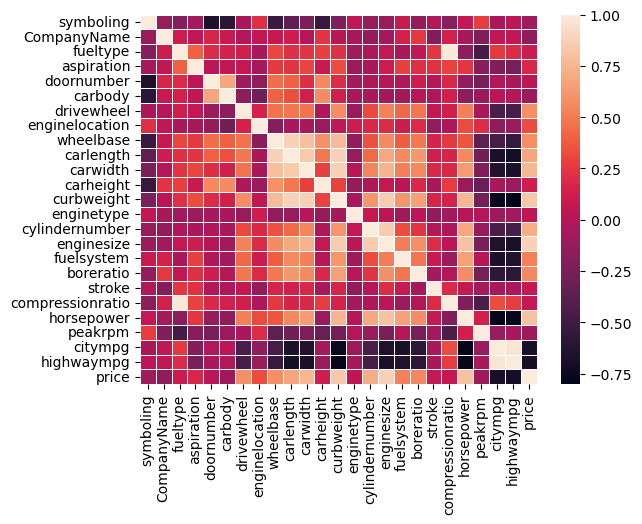

In [56]:
sns.heatmap(corr, fmt='.2f', linewidths=0.5)
plt.show()

The above heatmap can be used for feature selection. Here, price is the target variable. If features have a correlation greater than +0.05 or lesser than -0.05, then they are good features which can be used for the linear regression model.
After analyzing the data, we can say that the important factors in determining the price are:

Engine Type, Fuel type, Car Body, Aspiration, Cylinder Number, Drivewheel, Curbweight, Car Length, Car width, Engine Size, Boreratio, Horse Power and Wheel base

In [14]:
import numpy as np

In [15]:
#Removing unnecessary rows
df.drop(columns=['car_ID','symboling','carheight','stroke','compressionratio','peakrpm','citympg','highwaympg','audi','bmw','buick','chevrolet','honda','isuzu','jaguar','mazda','mitsubishi','nissan','peugeot','plymouth','porsche','renault','subaru','toyota','volkswagen','volvo','2bbl','4bbl','idi','mpfi','spfi','spdi'], inplace=True)
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,turbo,...,six,three,twelve,two,dodge,mercury,saab,two,rear,mfi
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.drop(columns=['dodge','mercury','saab','rear','mfi'],inplace=True)
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,turbo,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wheelbase   205 non-null    float64
 1   carlength   205 non-null    float64
 2   carwidth    205 non-null    float64
 3   curbweight  205 non-null    int64  
 4   enginesize  205 non-null    int64  
 5   boreratio   205 non-null    float64
 6   horsepower  205 non-null    int64  
 7   price       205 non-null    float64
 8   gas         205 non-null    float64
 9   turbo       205 non-null    float64
 10  hardtop     205 non-null    float64
 11  hatchback   205 non-null    float64
 12  sedan       205 non-null    float64
 13  wagon       205 non-null    float64
 14  fwd         205 non-null    float64
 15  rwd         205 non-null    float64
 16  dohcv       205 non-null    float64
 17  l           205 non-null    float64
 18  ohc         205 non-null    float64
 19  ohcf        205 non-null    f

In [18]:
#standardization or feature scaling
df = (df - df.mean())/df.std()
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,gas,turbo,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,two
0,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.027324,0.327995,-0.468149,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,1.127628
1,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.403473,0.327995,-0.468149,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,1.127628
2,-0.706865,-0.230948,-0.190101,0.513625,0.602571,-2.399008,1.261448,0.403473,0.327995,-0.468149,...,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,1.127628
3,0.173274,0.206750,0.136209,-0.419770,-0.430023,-0.516003,-0.053537,0.084279,0.327995,-0.468149,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
4,0.106848,0.206750,0.229440,0.515545,0.218350,-0.516003,0.275209,0.522389,0.327995,-0.468149,...,-0.28029,-0.259573,-0.140725,4.189312,-1.854632,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.761377,0.338419,1.662375,0.249921,0.446659,0.327995,-0.468149,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
201,1.717669,1.195622,1.348215,0.947672,0.338419,1.662375,1.413178,0.722042,0.327995,2.125651,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
202,1.717669,1.195622,1.394830,0.876611,1.106861,0.923942,0.755685,1.027468,0.327995,-0.468149,...,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,-0.882491
203,1.717669,1.195622,1.394830,1.270327,0.434474,-1.180593,0.047616,1.150765,-3.033954,2.125651,...,-0.28029,-0.259573,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,-0.882491


In [19]:
y=np.asarray(df['price'].values.tolist())
y

array([ 2.73242539e-02,  4.03473402e-01,  4.03473402e-01,  8.42786174e-02,
        5.22389106e-01,  2.47005370e-01,  5.54934457e-01,  7.06395512e-01,
        1.32663479e+00,  5.73606350e-01,  3.94711192e-01,  4.56672533e-01,
        9.63003084e-01,  9.79901631e-01,  1.41300514e+00,  2.18846071e+00,
        3.50967677e+00,  2.95452819e+00, -1.01713115e+00, -8.73931609e-01,
       -8.38882770e-01, -9.64432718e-01, -8.63667306e-01, -6.65891714e-01,
       -8.82193121e-01, -8.24237362e-01, -7.09452414e-01, -5.90661884e-01,
       -5.45223568e-01, -3.91433660e-02, -8.50899515e-01, -8.03833931e-01,
       -9.86087894e-01, -8.44640793e-01, -7.69536138e-01, -7.48757183e-01,
       -7.48757183e-01, -6.73652528e-01, -5.23443218e-01, -5.54736824e-01,
       -3.73233907e-01, -4.15216801e-02, -3.66975186e-01, -8.12596140e-01,
       -5.45786853e-01, -5.45786853e-01, -2.78977565e-01,  2.37497060e+00,
        2.78804621e+00,  2.84437470e+00, -1.01162348e+00, -8.98966494e-01,
       -8.11344396e-01, -

In [20]:
df.drop(['price'], axis=1, inplace=True)
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,gas,turbo,hardtop,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,two
0,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.327995,-0.468149,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,1.127628
1,-1.686643,-0.425480,-0.842719,-0.014531,0.074267,0.517804,0.174057,0.327995,-0.468149,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,1.127628
2,-0.706865,-0.230948,-0.190101,0.513625,0.602571,-2.399008,1.261448,0.327995,-0.468149,-0.201025,...,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,1.127628
3,0.173274,0.206750,0.136209,-0.419770,-0.430023,-0.516003,-0.053537,0.327995,-0.468149,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
4,0.106848,0.206750,0.229440,0.515545,0.218350,-0.516003,0.275209,0.327995,-0.468149,-0.201025,...,-0.28029,-0.259573,-0.140725,4.189312,-1.854632,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.761377,0.338419,1.662375,0.249921,0.327995,-0.468149,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
201,1.717669,1.195622,1.348215,0.947672,0.338419,1.662375,1.413178,0.327995,2.125651,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,0.536560,-0.363249,-0.069843,-0.069843,-0.140725,-0.882491
202,1.717669,1.195622,1.394830,0.876611,1.106861,0.923942,0.755685,0.327995,-0.468149,-0.201025,...,-0.28029,3.833691,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,-0.882491
203,1.717669,1.195622,1.394830,1.270327,0.434474,-1.180593,0.047616,-3.033954,2.125651,-0.201025,...,-0.28029,-0.259573,-0.140725,-0.237538,-1.854632,2.739503,-0.069843,-0.069843,-0.140725,-0.882491


In [21]:
X=np.asarray(df.values.tolist())
X

array([[-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.14072463,  1.12762792],
       [-1.68664293, -0.4254799 , -0.84271939, ..., -0.06984303,
        -0.14072463,  1.12762792],
       [-0.70686548, -0.23094769, -0.19010076, ..., -0.06984303,
        -0.14072463,  1.12762792],
       ...,
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463, -0.88249141],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463, -0.88249141],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.06984303,
        -0.14072463, -0.88249141]])

In [22]:
y=y.reshape(len(y),1)

In [23]:
y.shape, X.shape

((205, 1), (205, 28))

In [24]:
X=np.concatenate((X,np.ones((205,1))), axis=1)
X

array([[-1.68664293, -0.4254799 , -0.84271939, ..., -0.14072463,
         1.12762792,  1.        ],
       [-1.68664293, -0.4254799 , -0.84271939, ..., -0.14072463,
         1.12762792,  1.        ],
       [-0.70686548, -0.23094769, -0.19010076, ..., -0.14072463,
         1.12762792,  1.        ],
       ...,
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.14072463,
        -0.88249141,  1.        ],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.14072463,
        -0.88249141,  1.        ],
       [ 1.71766854,  1.19562185,  1.3948302 , ..., -0.14072463,
        -0.88249141,  1.        ]])

In [25]:
X.shape

(205, 29)

In [26]:
#Splitting data into train and test set
def split_data(X, y, test_size=0.2, random_state=0):
    np.random.seed(random_state)
    indices=np.random.permutation(len(X))
    data_test_size=int(X.shape[0]*test_size)
    train_indices=indices[data_test_size:]
    test_indices=indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [27]:
#Coding the linear regression algorithm
class LinearRegression():
    def __init__(self):
        pass
    def forward(self,X,y,W):
        f=sum(W*X)
        loss=((f-y)**2)/2
        return loss, f
    def updateWeights(self,X,f,y_true,W,alpha,index):
        for i in range(X.shape[1]):
            W[i] -= (alpha*(f-y_true[index])*X[index][i])
        return W
    def train(self, X, y, iters=10, alpha=0.001, random_state=0):
        num_rows=X.shape[0]
        num_cols=X.shape[1]
        W=np.random.randn(1,num_cols)/np.sqrt(num_rows) #Weight initialization
        #calculating loss and updating weights
        train_loss = []
        num_iters = []
        train_indices = [i for i in range(X.shape[0])]
        for j in range(iters):
            cost=0
            np.random.seed(random_state)
            np.random.shuffle(train_indices)
            for i in train_indices:
                loss, f = self.forward(X[i],y[i],W[0])
                cost+=loss
                W[0]=self.updateWeights(X, f, y, W[0], alpha, i)
            train_loss.append(cost)
            num_iters.append(j)
        return W[0], train_loss, num_iters
    def test(self, X_test, y_test, W_trained):
        test_pred = []
        test_loss = []
        test_indices = [i for i in range(X_test.shape[0])]
        for i in test_indices:
            loss, y_test_pred = self.forward(X_test[i], W_trained, y_test[i])
            test_pred.append(y_test_pred)
            test_loss.append(loss)
        return test_pred, test_loss
    def predict(self, W_trained, X_sample):
        prediction=sum(W_trained*X_sample)
        return prediction

## Performing the Linear Regression

In [28]:
#Splitting the dataset
X_train, y_train, X_test, y_test = split_data(X,y)

In [29]:
regressor=LinearRegression()

C:\Users\talkt\AppData\Local\Temp\ipykernel_47776\3777784122.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i] -= (alpha*(f-y_true[index])*X[index][i])


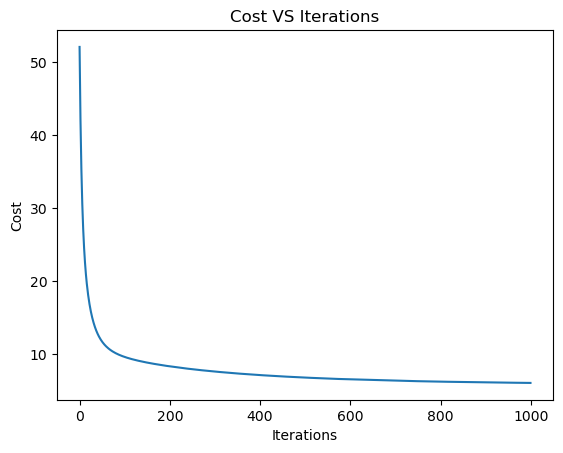

In [42]:
#training
W_trained, train_loss, num_iters = regressor.train(X_train, y_train, iters=1000, alpha=0.0001)
plt.plot(num_iters, train_loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost VS Iterations")
plt.show()

In [31]:
#testing
test_pred, test_loss = regressor.test(X_test, y_test, W_trained)

In [32]:
test_pred

[4.75934132564529,
 1.2604455337378027,
 0.8698421476928855,
 -1.5825206169214567,
 1.25907228702583,
 -1.6489832900604213,
 5.91571684542188,
 4.887535084831558,
 3.5953342287421486,
 5.698545674966469,
 3.3841485579092065,
 55.116258133803775,
 -2.3928217160848018,
 -1.9222990714724246,
 4.5043635544083305,
 -1.253933439817935,
 -0.4374552244579173,
 5.680345602020911,
 1.4578790149757481,
 6.457486224251341,
 -0.8411023181773085,
 1.7152590212028542,
 -0.5842010383331493,
 -0.7266513969349547,
 1.767573064463909,
 2.131630332179318,
 4.542154514695235,
 4.037946481765226,
 3.4117832124851812,
 4.712320787281345,
 1.0677978685615597,
 -0.03426466067224643,
 6.003284914248672,
 0.4513365837610649,
 5.435983665389013,
 41.3218112637037,
 1.1517570066326175,
 3.332528162021898,
 5.527433936671086,
 84.80383951531834,
 3.443954516226034]

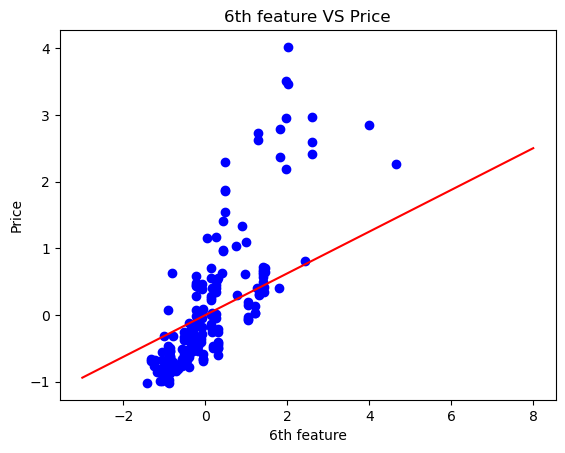

In [41]:
x_axis = np.arange(-3,9)
y_axis = W_trained[6] * x_axis + W_trained[-1]
plt.scatter(X[:,6], y, c='b')
plt.plot(x_axis, y_axis, c='r')
plt.xlabel("6th feature")
plt.ylabel("Price")
plt.title("6th feature VS Price")
plt.show()